<a href="https://colab.research.google.com/github/Jason20262/-SeminarioBigdata/blob/main/Lab4_Copia_de_clasif_RCV_GPM_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Artificiales Para Predecir Riesgo Cardiovascular

**Autor: Elias Buitrago**\
Bogotá, Colombia \
Actualizado: 18 oct 2023 \
_Nota: Código ajustado para su ejecución en Google Colaboratory_\
Verificado con las siguientes versiones: Python 3.10.12, Tensorflow: 2.13.0, Keras: 2.13.1_

## Cargar librerías
The Python programming language relies on specialized code libraries for various functionalities. For example, if we want to graph we can invoke (call, load) a specialized library such as matplotlib. This packaging of code with concrete functions and the like is similar to what R software does with packages. Next, the libraries required for the correct training of multilayer perceptron neural networks are imported. The specialized libraries specifically for training neural networks to predict cardiovascular risk are TensorFlow (_version 2.13.0_) and Keras (_version 2.13.1_).

<!-- El lenguaje de programación python se apoya en librerías de código especializadas en diversas funcionalidades. Por ejemplo, si queremos graficar podemos invocar (llamar, cargar) una librerías especilizada como matplotlib. ESte empaquetamiento de código con funciones concretas y similares, se asemeja a los que hace el software R con los paquetes. A continuación, se importan las librerías requeridas para el correcto entrenamiento de redes neuronales del tipo perceptrón multicapa. Las librerías especializadas, específicamente para entrenar las redes neuronales para predecri riesgo cardiovascular son las siguientes TensorFlow (_versión 2.13.0_) y Keras (_versión 2.13.1_). -->

In [ ]:
# Librerías básicas de Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librería para calcular tiempo de ejecución
from time import process_time

# Librerías para particionar conjunto de datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

# Funciones requeridas de la librerías que permite entrenar redes neuronales
# artificiales
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import utils as np_utils

# Funciones requeridas de la librería para evaluar desempeño de la RNA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

## Verificación de versiones de librerías
De manera rutinaria se recomienda hacer la verificación de la versión actual de las versiones de Python, TensorFlow y Keras. Por lo tanto a continuación se mnuestran las lineas de código para verificar las versiones de dichas librerías, incluyendo la versión del sistema operativo. Google Colaboratory se ejecuta sobre un sistema operatio Linux distribución Ubuntu,

In [ ]:
import tensorflow
import keras
print("El sistema operativo base de Google Colaboratory es: ")
!lsb_release -a
print("La versión actual de Python es: ")
!python --version
print("La versión instalada de Tensorflow es: " + tensorflow.__version__)
print("La versión instalada de Keras es: " + keras.__version__)

El sistema operativo base de Google Colaboratory es: 
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy
La versión actual de Python es: 
Python 3.10.12
La versión instalada de Tensorflow es: 2.15.0
La versión instalada de Keras es: 2.15.0


## Cargar datos
En el contexto del presente taller, los datos que se utilizan para el entrenamiento, evaluación y validación se almacenan en un directorio de Google Drive del mismo usuario actual de Google Colaboratory. Para acceder a los datos solo se requiere ejecutar la primera celda de código de esta sección, luego brindar los permisos de acceo respectivo y, finalmente, cambiar la ruta de acceso al archivo de los datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/BigData/Lab4/pacientes_rcv_limpio.xlsx")

#Editar Rutas:
# Ruta Johan data = pd.read_excel("/content/drive/MyDrive/BigData/Lab4/pacientes_rcv_limpio.xlsx")
# Ruta Jason data = pd.read_excel("/content/drive/MyDrive/BigData/Lab4/pacientes_rcv_limpio.xlsx")
# Ruta Daniel data = pd.read_excel("/content/drive/MyDrive/BigData/Lab4/pacientes_rcv_limpio.xlsx")
target = data.loc[:, 'Clasificación de RCV Global'].astype(int)
data = data.drop(['Clasificación de RCV Global'], axis=1)
target=pd.Categorical(target).codes

In [ ]:
print(data.shape)
data.head()

(3000, 35)


,Edad (años),Genero,Zona,Fumador Activo,¿Diabetes?,Hipertensión Arterial Sistemica,HTA + DM,Clasificacion de Diabetes o del ultimo estado de Glicemia,Complicaciones y Lesiones en Organo Blanco,Antecedentes_Fliar_Enfermedad_Coronaria,...,Creatinina,Factor de corrección de la formula,Proteinuria,Calculo de TFG corregida (Cockcroft-Gault),Estadio IRC,Remisiones Especialidad,Farmacos Antihipertensivos,Estatina,Antidiabeticos,Adherencia al tratamiento
0,82,2,1,1,1,2,1,0.0,1,1,...,132.0,85,0.0,37.348485,3.0,1.0,1.0,0,2.0,1.0
1,83,2,1,1,1,2,1,0.0,1,1,...,97.0,85,0.0,33.000000,3.0,1.0,2.0,0,0.0,1.0
2,54,2,1,1,1,1,1,0.0,1,1,...,97.0,85,0.0,51.000000,3.0,1.0,3.0,0,0.0,1.0
3,68,2,1,1,1,1,1,0.0,1,1,...,86.0,85,0.0,53.372093,3.0,1.0,1.0,0,0.0,1.0
4,68,2,1,1,2,1,1,2.0,1,1,...,71.0,85,0.0,68.239437,2.0,1.0,2.0,0,3.0,1.0


In [ ]:
data.dtypes

Edad (años)                                                    int64
Genero                                                         int64
Zona                                                           int64
Fumador Activo                                                 int64
¿Diabetes?                                                     int64
Hipertensión Arterial Sistemica                                int64
HTA + DM                                                       int64
Clasificacion de Diabetes o del ultimo estado de Glicemia    float64
Complicaciones  y Lesiones en Organo Blanco                    int64
Antecedentes_Fliar_Enfermedad_Coronaria                        int64
Tension SISTOLICA                                              int64
Tension DIASTOLICA                                           float64
HTA COMPENSADOS                                                int64
Colesterol Total                                               int64
Colesterol HDL                    

## Conteo de clases

El desbalance de clases es notorio. La clase que representa al riesgo cardiovascular intermedio tiene 40% menos muestras que el riesgo cardiovascular alto. Entretanto, la clase que representa al riesgo cardiovascular bajo tiene 60% menos muestras que el riesgo cardiovascular alto.

In [ ]:
import pandas as pd
pd.DataFrame(target).value_counts()

2    1597
1     820
0     583
Name: count, dtype: int64

## Preparar datos para el entrenamiento de la RNA
En esta sección se excluyen la etapa de preprocesamiento de los datos, en la cual, se segue una metodología para asegurar la calidad de los datos. Así mismo, se excluye la etapa de análisis exploratorio de datos, en la cual, se eaplican técnicas de estadística descriptiva y, en algunos casos, inferencial. Por lo tanto, para efectos del taller, esta sección se restringue a la partición del conjunto original de datos para obtener los tres subconjguntos vitales en el entrenamiento y evaluación del modelo predictivo.

### Particionar datos

In [ ]:
## Particionar el conjunto de datos para crear datos de entrenamiento, evaluación y validación.
sc = StandardScaler()
Xsc = sc.fit(data)
X = Xsc.transform(data)
X.shape

X_train, X_test, y_train, y_test = split(X,target,
                                         test_size=0.30,
                                         random_state=42,
                                         stratify=target)
X_train, X_valid, y_train, y_valid = split(X_train, y_train,
                                           test_size=0.2,
                                           stratify=y_train)
print("El tamaño de los nuevos subconjuntos es: ", X_train.shape, X_test.shape, X_valid.shape)
print("Y es la variable que tiene las etiquetas de las clases a predecir: ", y_train.shape, y_test.shape, y_valid.shape)

El tamaño de los nuevos subconjuntos es:  (1680, 35) (900, 35) (420, 35)
Y es la variable que tiene las etiquetas de las clases a predecir:  (1680,) (900,) (420,)


### Transformación de etiquetas de la clase objetivo (Predicción Multiclase)

In [ ]:
# #Transformación de las etiquetas requerida para el entrenamiento de RNA
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
Y_valid = np_utils.to_categorical(y_valid)

## Entrenamiento del modelo predictivo basado en RNA

In [ ]:
# Optimización de hiperparámetros
#funcion de activacion
#loss
#metrics
#optimizer
#learning_rate
#epochs
#batch_size

### Diseño de la arquitectura del modelo de red neuronal artificial

### Compilar el modelo creado

In [ ]:
# Definir la arquitectura del modelo de la RNA
modelRNA = models.Sequential()
modelRNA.add(Dense(5, batch_input_shape=(None, 35), activation='relu')) ## neuronas en la capa de entrada (batch_input_shape) (1) y #neuronas en la primera capa oculta (35)
#modelRNA.add(Dense(7, activation='relu'))# Función de activación de entreda
modelRNA.add(Dense(3, activation='softmax')) # Función de activación lineal de Salidas
#GridsearchCV - Nos ayuda a realizar optimización de acuerdo a las variables

In [ ]:
# compile the keras (tensorflow) flow graph
modelRNA.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Entrenamiento del modelo de RNA

In [ ]:
# Inicializar el reloj para calcular tiempo de cómputo
t0 = process_time()

In [ ]:
training_log = modelRNA.fit(X_train,
                    Y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_valid, Y_valid),
                    verbose=1)

Epoch 1/200
53/53 [==============================] - 1s 6ms/step - loss: 0.7034 - accuracy: 0.4220 - val_loss: 0.6943 - val_accuracy: 0.4357
Epoch 2/200
53/53 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.4685 - val_loss: 0.6664 - val_accuracy: 0.4786
Epoch 3/200
53/53 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.5131 - val_loss: 0.6438 - val_accuracy: 0.5190
Epoch 4/200
53/53 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.5476 - val_loss: 0.6242 - val_accuracy: 0.5429
Epoch 5/200
53/53 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.5619 - val_loss: 0.6057 - val_accuracy: 0.5595
Epoch 6/200
53/53 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.5720 - val_loss: 0.5875 - val_accuracy: 0.5714
Epoch 7/200
53/53 [==============================] - 0s 2ms/step - loss: 0.5557 - accuracy: 0.5857 - val_loss: 0.5696 - val_accuracy: 0.5786
Epoch 8/200
5

In [ ]:
# # Tiempo de computo
t1 = process_time()
tc = t1-t0

# # Mostrar tiempo de cómputo del entrenamiento del modelo de RNA
print('El tiempo de cómputo con RNA fue: %.2f segundos' % tc)

El tiempo de cómputo con RNA fue: 31.82 segundos


### Predicción

In [ ]:
X_pred = modelRNA.predict(X_test, batch_size = 32, verbose=1)
y_pred = np.argmax(X_pred, axis=1)
print(y_pred.shape)

29/29 [==============================] - 0s 1ms/step
(900,)


## Evaluación del modelo entrenado

### Gráficas de pérdida de entrenamiento y validación

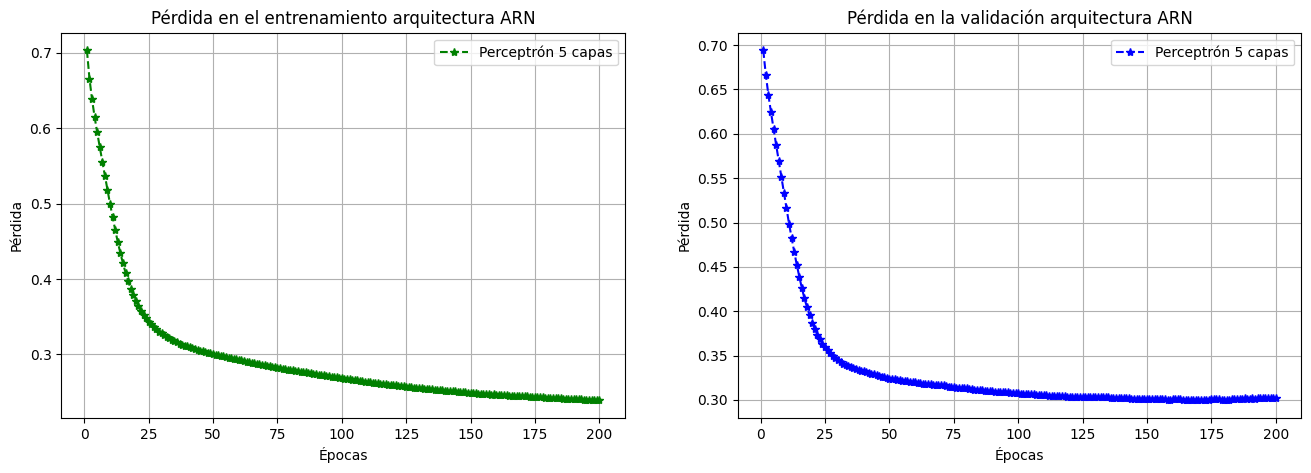

In [ ]:
# Gráficas de pérdidas en entrenamiento y validación
loss = training_log.history['loss']
val_loss = training_log.history['val_loss']
epochs = range(1, len(val_loss) + 1)

# Gráfica comparativa: pérdida en entrenamiento
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'g*--', label="Perceptrón 5 capas")
plt.title('Pérdida en el entrenamiento arquitectura ARN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc="upper center", fontsize="small")
plt.legend()
plt.grid(True)

# Gráfica comparativa: pérdida en validación
plt.subplot(1, 2, 2)
plt.plot(epochs, val_loss, 'b*--', label="Perceptrón 5 capas")
plt.title('Pérdida en la validación arquitectura ARN')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc="upper center", fontsize="small")
plt.legend()
plt.grid(True)
plt.show()

### Visualizar reporte del entrenamiento de la RNA

In [ ]:
# Métricas de desempeño
# Mostrar la precisión, recall, F1-score
print("\n", classification_report(y_test, y_pred, digits=3))


               precision    recall  f1-score   support

           0      0.816     0.737     0.775       175
           1      0.661     0.683     0.672       246
           2      0.877     0.894     0.885       479

    accuracy                          0.806       900
   macro avg      0.785     0.771     0.777       900
weighted avg      0.806     0.806     0.805       900



### Visualizar matriz de confusión

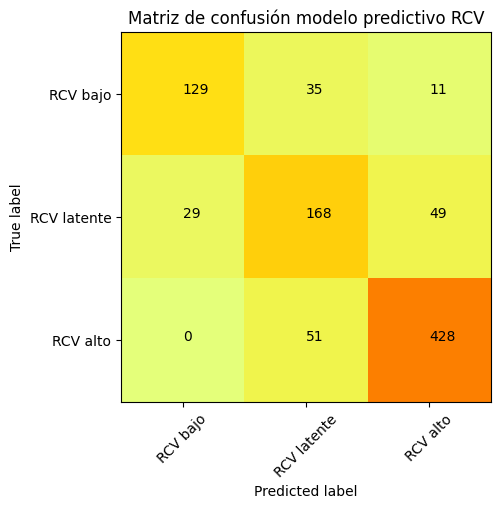

In [ ]:
# Matriz de confusión
# cm = metrics.confusion_matrix(Y_test.argmax(axis=1),
#                               Y_pred.argmax(axis=1))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['RCV bajo','RCV latente', 'RCV alto']
plt.title('Matriz de confusión modelo predictivo RCV')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
for i in range(3):
    for j in range(3):
        plt.text(j,i, str(cm[i][j]))

### Curva ROC


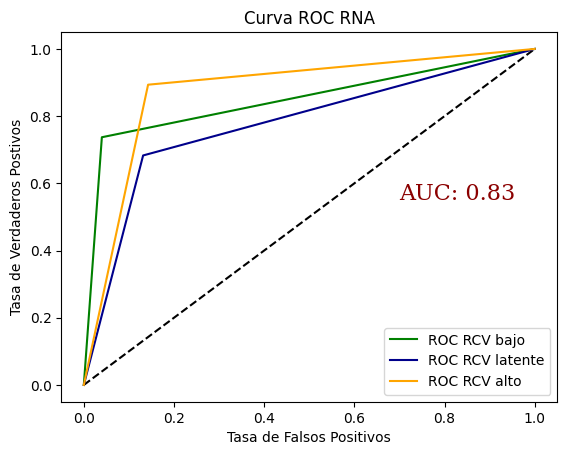

In [ ]:
# Curva ROC
# #https://stackabuse.com/understanding-roc-curves-with-python/
Y_pred = np_utils.to_categorical(y_pred)
auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, threshold = roc_curve(Y_test[:,0], Y_pred[:,0])
font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
    }
plt.plot(fpr, tpr, color='green', label='ROC RCV bajo')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Postivos')
plt.title('Curva ROC RNA')
fpr, tpr, threshold = roc_curve(Y_test[:,1], Y_pred[:,1])
plt.plot(fpr, tpr, color='darkblue', label='ROC RCV latente')
fpr, tpr, threshold = roc_curve(Y_test[:,2], Y_pred[:,2])
plt.plot(fpr, tpr, color='orange', label='ROC RCV alto')
plt.text(0.7, 0.55, 'AUC: %.2f' % auc, fontdict=font)
plt.legend()
plt.show()

In [ ]:
#Guardar modelo
# import pickle
# pickle.dump(modelRNA, open('RNA_RCV_01.pkl', 'wb'))

# #Cargar modelo almacenado
# model = pickle.load(open('RNA_RCV_01.pkl', 'rb'))
# result_val = model.score(X_valid, y_valid)
# result_test = model.score(X_test, y_test)
# print(result_val)
# print(result_test)

###Experimentos

Se realizan los siguientes experimentos sobre las entradas de las redes neuronales artificiales estudiadas por consiguiente se presentan los resultados encontrados:


* Primera prueba:


![Anexo1](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihbqXUlIKNfbDJuPisxQKNP4e5IdSleFOwPUeG0YoIG9YOEuB7vu-2XpX_s42C9OBPAhT90UPKN1oxweouYlj7OqBjNN3S4zWtU=w1366-h633-rw-v1)

![Anexo2](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihaCXjTxDgg3GgxX5vZp3ynhdpnkV_8DqPwj-S0Hht7tg7lqClYu3zjNdwIxAZModTimmIuC4DMjTltKbvcFKRks1fJUj17fX8Q=w1366-h633)

---

* Segunda prueba:

![Anexo3](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihYSwEo5l-edn3VMXOvB0kNxVhnruDEqfH79kyLRFlr06P6ne8vSVgJGyPmFsAK9Pf42KaswAtYwRzEyap2E7b6dRHWvdBMr5iU=w1366-h633-rw-v1)

![Anexo4](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihZqcmGVlqpTn0i37Sc7Mwtrxp_m7OzN_pt01p3nMlK_ncj3-r0uhP_Uktt9ah-V-MGjF9CTgO2cdoc5xWuv3XtX3NkJCEBJMg=w1366-h633)

---

* Tercera prueba:

![Anexo5](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihbk5JPsfv3HOyxgaB5BvW0erh92QfvZYvZDihtADpBC-kaL6cjsUHZo2R34sVY1V7bC0Utqwxo67qRD23yBqJAxCfJStnNwQPY=w1366-h633-rw-v1)

![Anexo6](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihZDzIS0qkeNoqgetIRDirOQvqlzZCtGg5gUgB1bW-Tc-SU_VQN9DAzkSZC7E1SxRdFLW6YJZSS6P_D_8XZ7b8nRFTq_oAVsVQ=w1366-h633)

---

* Cuarta prueba:

![Anexo7](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihb5MfahbdH7k8b3ks3TdDnvswIj7WiMkrqafCZmuli0CdusOevcXv4-_MT6TcP1Br17nkx4wNpLEu3CaYZ3BCdCE3pNApxHc2g=w1366-h633-rw-v1)

![Anexo8](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihYdDx4rLv8lxEGxuHtI9RZ8tKiI5Z8gouwZP0iGELTqJF1f2wtmTMnDsS_VOkOuKqzdYvtLUADHKxeNAuR4vtsQ-AQ170S7QA=w1366-h633)


---

* Quinta prueba:

![Anexo9](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihY1xA19E52nX-OwMJOilxxeR9s2SjNS6_EZ8mLS2W7pGFYKyIxqWd6zXBb7dbGnlFytRVSge0MEXHok_CBJtP10rw8ogOKUlzg=w1366-h633-rw-v1)

![Anexo10](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihZ4MxAX4nCfNjwcDHtah1Zd5Pmr6cAa7K5Ww2D5mHXZZHDhVRrufzKy61DDHP3-MQUEVTvgfsEmGQ16moIBFNLI2oBT-b30gQ=w1366-h633)

### Conclusiones:

El modelo RNA modificado ha mejorado significativamente su rendimiento, alcanzando un AUC (Área bajo la curva) de 0.87, que es superior al umbral de 0.86 requerido para la actividad. Los cambios del modelo y la cantidad de entradas han resultado en una mejora que cumple con los criterios establecidos, también hay que tener en cuenta que con un pequeño cambio realizado en la cuarta prueba pudimos alcanzar el resultado solicitado pero no superarlo.


El código base presentaba la siguiente arquitectura:

![Anexo1](https://lh3.googleusercontent.com/u/1/drive-viewer/AKGpihaalzV3hn3nIakv4dwHxAI8Q5gKBQfwV7rjuynGjdp72ocaTWBxsr48DF9SCV3kKL8OHYCfZ8UdJ9kBrJ2b9u5DXL8OCPeeJOg=w1366-h633-rw-v1)





#### Informe diseñado por:

#####Breiner Spencer Barrios Asprilla - **121230**
#####Johan Sebastian Quintero Vargas - **107699**
#####Jason Rodriguez - **99229**
#####Daniel Gutierrez - **90378**